In [26]:
using CSV
using DataFrames
using Statistics

In [27]:
# Define the file path
file_path = "C:\\Users\\USER\\Desktop\\Skills\\Julia\\Screentime Data Analysis\\screentime_dataset.csv"

"C:\\Users\\USER\\Desktop\\Skills\\Julia\\Screentime Data Analysis\\screentime_dataset.csv"

In [28]:
# Read dataset
df = CSV.read(file_path, DataFrame)
#show dataset
first(df, 5)

Row,Date,App,Usage (minutes),Notifications,Times Opened
,Date,String15,Int64,Int64,Int64
1,2024-08-07,Instagram,81,24,57
2,2024-08-08,Instagram,90,30,53
3,2024-08-26,Instagram,112,33,17
4,2024-08-22,Instagram,82,11,38
5,2024-08-12,Instagram,59,47,16


# What is the average, minimum, and maximum app usage (in minutes)?

In [29]:

# Calculate statistics for usage
avg_usage = mean(df[!,"Usage (minutes)"])

37.75

In [30]:
max_usage = maximum(df[!, "Usage (minutes)"])

119

# What is the correlation between notifications and times opened?

In [31]:
# Calculate correlation
correlation = cor(df[!, "Notifications"], df[!, "Times Opened"])

0.8019203836541782

# Plot app usage over time to observe trends.

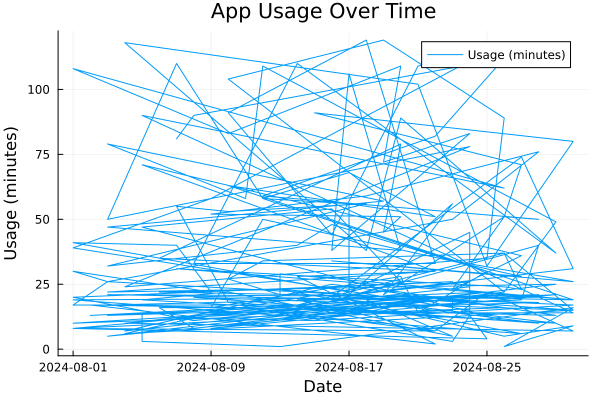

In [35]:
using Plots
using Dates

# Ensure the Date column is in Date format
df[!, "Date"] = Date.(df[!, "Date"])

# Plot usage over time
plot(df[!, "Date"], df[!, "Usage (minutes)"], 
    label="Usage (minutes)", xlabel="Date", ylabel="Usage (minutes)", 
    title="App Usage Over Time", legend=:topright)

# How does the average session length (Usage per Times Opened) vary?

In [38]:
# Calculate average session length
df[!, "Avg_Session_Length"] = df[!, "Usage (minutes)"] ./ df[!, "Times Opened"]

# Calculate overall average session length
avg_session_length = mean(df[!, "Avg_Session_Length"])


6.973369507706086

# Aggregate data by week to analyze weekly usage trends

In [39]:
df[!, "Week"] = Dates.week.(df[!, "Date"])

# Group by week and calculate total usage
weekly_usage = combine(groupby(df, "Week"), "Usage (minutes)" => sum => "Total_Usage")



Row,Week,Total_Usage
,Int64,Int64
1,31,833
2,32,1527
3,33,1698
4,34,1898
5,35,1594


# Visualize notifications vs. times opened to detect patterns.

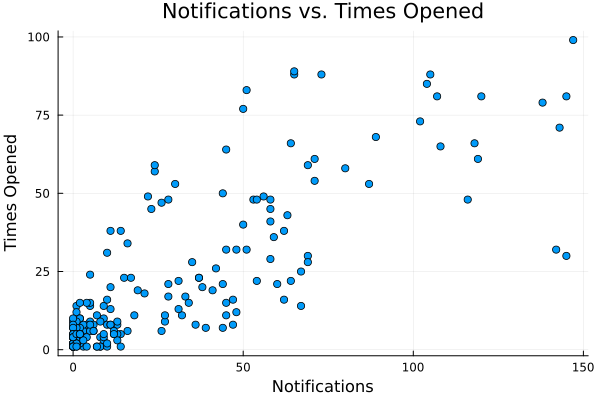

In [40]:
scatter(df[!, "Notifications"], df[!, "Times Opened"], 
    xlabel="Notifications", ylabel="Times Opened", 
    title="Notifications vs. Times Opened", label="")

# Which day had the highest app usage?

In [43]:
max_usage_row = df[argmax(df[!, "Usage (minutes)"]), :]

Row,Date,App,Usage (minutes),Notifications,Times Opened,Avg_Session_Length,Week
,Date,String15,Int64,Int64,Int64,Float64,Int64
20,2024-08-18,Instagram,119,53,48,2.47917,33
